In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [297]:
cars = pd.read_csv('cars_data.csv')

In [298]:
cars.head(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225,18,24,3893,115,197
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6.0,290,17,24,3153,100,174
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4.0,170,22,31,3252,104,179
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4.0,170,23,30,3638,105,180
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3.0,6.0,220,20,28,3462,104,179


In [299]:
cars.tail(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
418,Volvo,S60 2.5 4dr,Sedan,Europe,All,"$31,745","$29,916",2.5,5.0,208,20,27,3903,107,180
419,Volvo,S60 T5 4dr,Sedan,Europe,Front,"$34,845","$32,902",2.3,5.0,247,20,28,3766,107,180
420,Volvo,S60 R 4dr,Sedan,Europe,All,"$37,560","$35,382",2.5,5.0,300,18,25,3571,107,181
421,Volvo,S80 2.9 4dr,Sedan,Europe,Front,"$37,730","$35,542",2.9,6.0,208,20,28,3576,110,190
422,Volvo,S80 2.5T 4dr,Sedan,Europe,All,"$37,885","$35,688",2.5,5.0,194,20,27,3691,110,190
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208,20,27,3823,109,186


In [300]:
cars.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [301]:
cars.shape

(428, 15)

## Using Pandas Profiling

In [302]:
from ydata_profiling import ProfileReport

report = ProfileReport(cars)
report.to_file(output_file='used_car_report.html')

Summarize dataset:  60%|▌| 12/20 [00:00<00:00, 129.78it/s, Describe variable: Le
Export report to file: 100%|█████████████████████| 1/1 [00:00<00:00, 211.55it/s]


In [303]:
# Check if any missing values are present in the dataframe
cars.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

There is 2 missing values of `Cylinders`. We will drop these as dropping 2 won't have big impact.

In [304]:
cars = cars.dropna()

In [305]:
cars.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [306]:
# Obtain the summary of the dataframe
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    object 
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 53.2+ KB


In [307]:
cars.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,426,38,Toyota,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,426,423,C240 4dr,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,426,6,Sedan,262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Origin,426,3,Asia,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DriveTrain,426,3,Front,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSRP,426,409,"$33,995",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Invoice,426,423,"$19,638",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EngineSize,426.0,NaN,NaN,NaN,3.21,1.1,1.4,2.4,3.0,3.9,8.3
Cylinders,426.0,NaN,NaN,NaN,5.81,1.56,3.0,4.0,6.0,6.0,12.0
Horsepower,426.0,NaN,NaN,NaN,215.88,71.99,73.0,165.0,210.0,255.0,500.0


### Cleaning up `MSRP` column

In [308]:
cars.head(1)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189


In [309]:
pd.set_option('mode.chained_assignment', None) # to surpress warning

# Convert MSRP and Invoice datatype to integer so we need to remove $ sign and comma (,) from these 2 columns
cars['MSRP'] = cars['MSRP'].str.replace('$','')
cars['MSRP'] = cars['MSRP'].str.replace(',','')
cars['MSRP'] = cars['MSRP'].astype('int')

In [310]:
cars.head(1)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,"$33,337",3.5,6.0,265,17,23,4451,106,189


### Cleaning up `Invoice` column

In [311]:
cars['Invoice'] = cars['Invoice'].str.replace('$', '')
cars['Invoice'] = cars['Invoice'].str.replace(',', '')
cars['Invoice'] = cars['Invoice'].astype('int')

In [312]:
cars.head(1)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189


In [313]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    int64  
 6   Invoice      426 non-null    int64  
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 53.2+ KB


In [314]:
# Display the updated summary of the dataframe
# Now MSRP and Invoice columns are cleaned
cars.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,426,38,Toyota,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,426,423,C240 4dr,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,426,6,Sedan,262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Origin,426,3,Asia,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DriveTrain,426,3,Front,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSRP,426.0,NaN,NaN,NaN,32804.55,19472.46,10280.0,20324.75,27807.5,39225.0,192465.0
Invoice,426.0,NaN,NaN,NaN,30040.65,17679.43,9875.0,18836.0,25521.5,35754.75,173560.0
EngineSize,426.0,NaN,NaN,NaN,3.21,1.1,1.4,2.4,3.0,3.9,8.3
Cylinders,426.0,NaN,NaN,NaN,5.81,1.56,3.0,4.0,6.0,6.0,12.0
Horsepower,426.0,NaN,NaN,NaN,215.88,71.99,73.0,165.0,210.0,255.0,500.0


- What is the maximum/minium price of the used car?

In [315]:
cars['MSRP'].min(), cars['MSRP'].max()

(10280, 192465)

# Part 3: Data Visualization with Plotly Express

In [316]:
cars.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

### `Make` Feature

In [317]:
# Let's view various makes of the cars
cars['Make'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [318]:
fig = px.histogram(data_frame=cars,
                              x='Make',
                              labels={'Make': 'Manufacturer'},
                              title='Make of the Car',
                              color_discrete_sequence=['blue']).update_xaxes(categoryorder='total descending')
fig.show();

### `Type` Feature

In [319]:
cars['Type'].unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [320]:
type_ordered = cars['Type'].value_counts().sort_values(ascending=False)
type_ordered

Type
Sedan     262
SUV        60
Sports     47
Wagon      30
Truck      24
Hybrid      3
Name: count, dtype: int64

In [321]:
fig = px.histogram(data_frame=cars,
                  x='Type',
                  labels={'Type', 'Type'},
                  title='Type of the Car',
                  color_discrete_sequence=['blue']).update_xaxes(categoryorder='total descending') # with decending order

fig.show();

### `Origin` or Location Feature

In [322]:
cars['Origin'].unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [323]:
fig = px.histogram(data_frame=cars,
                  x='Origin',
                  labels={'Origin':'Location'},
                  title='Origin/Location of the Car Sales',
                  color_discrete_sequence=['brown']).update_xaxes(categoryorder='total descending')

fig.show();

### `DriveTrain` Feature

In [324]:
cars['DriveTrain'].unique()

array(['All', 'Front', 'Rear'], dtype=object)

In [325]:
fig = px.histogram(data_frame=cars,
                  x='DriveTrain',
                  labels={'DriveTrain': 'DriveTrain'},
                  title='DriveTrain of the Car',
                  color_discrete_sequence=['black']).update_xaxes(categoryorder='total descending')

fig.show();

### `Make` vs `Origin` Features

In [326]:
# Plot the make of the car and its location
fig = px.histogram(data_frame=cars,
                  x='Make',
                  color='Origin',
                  labels={'Make': 'Manufacturer'},
                  title='Make of the Car Vs Location')

fig.show();

### `Make` Vs `Type` Features

In [327]:
fig = px.histogram(data_frame=cars,
                  x='Make',
                  color='Type',
                  labels={'Make', 'Manufacturer'},
                  title='Make of the Car Vs Type')

fig.show();

Based on the chart,
+ Porsche has produced highest number of Sports type cars
+ Toyota has Hybrid car type.

# Prepare the Data before Model Training

### One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"

In [328]:
df_dummies = pd.get_dummies(cars, columns=['Make', 'Model', 'Type', 'Origin', 'DriveTrain'])
df_dummies.head(2)

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,33337,3.5,6.0,265,17,23,4451,106,189,...,False,False,False,False,True,False,False,True,False,False
1,23820,21761,2.0,4.0,200,24,31,2778,101,172,...,True,False,False,False,True,False,False,False,True,False


### Drop `Invoice` Feature
as it is similiar to MSRP, we gonna drop it

In [329]:
df_data = df_dummies.drop(['Invoice'], axis=1)
df_data.head(1)

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,3.5,6.0,265,17,23,4451,106,189,True,...,False,False,False,False,True,False,False,True,False,False


In [330]:
df_data.shape

(426, 482)

### Separate Features and Label

In [331]:
X = df_data.drop(['MSRP'], axis=1)
y = df_data['MSRP']

### Train Test Split

In [332]:
from sklearn.model_selection import train_test_split

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [334]:
X_train.shape, X_test.shape

((340, 481), (86, 481))

In [335]:
y_train.shape, y_test.shape

((340,), (86,))

# Part 6: Multiple Linear Regression Model

## 1) Linear Regression

In [336]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [337]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [338]:
score_linear_regression = linear_regression_model.score(X_test, y_test)
score_linear_regression

0.8530027026000379

# Part 7: Decision Tree & Random Forest Models

In [339]:
from sklearn.tree import DecisionTreeRegressor

In [340]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [341]:
score_decision_tree = decision_tree_model.score(X_test, y_test)
score_decision_tree

0.8413307208878527

In [342]:
from sklearn.ensemble import RandomForestRegressor

In [343]:
random_forest_model = RandomForestRegressor(n_estimators=5, max_depth=5)
random_forest_model.fit(X_train, y_train)

,n_estimators,5
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [344]:
score_random_forest = random_forest_model.score(X_test, y_test)
score_random_forest

0.8396750999358342

# Part 8: XG-BOOST Regressor Model

In [345]:
from xgboost import XGBRegressor

In [346]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [347]:
xgb_score = xgb_model.score(X_test, y_test)
xgb_score

0.8046935796737671

# Part 9: Gradient Boosting Regresser Model

In [348]:
from sklearn.ensemble import GradientBoostingRegressor

In [349]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [350]:
gb_regression = gb.score(X_test, y_test)
gb_regression

0.8743011328057305

# Part 10: Compare Models and Calculate Regression KPIs

In [351]:
def plot_results(model, model_type, y_pred, y_true):
    fig = px.scatter(x=y_pred, y=y_true, trendline="ols",title=model_type)
    fig.show()

In [352]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def get_score(y_pred, y_true):
    MAE = round(mean_absolute_error(y_pred, y_true), 2)
    MSE = round(mean_squared_error(y_pred, y_true), 2)
    RMSE = round(np.sqrt(MSE), 2)
    r2 = round(r2_score(y_pred, y_true), 2)
    
    print('MAE: ', MAE)
    print('MSE: ', MSE)
    print('RMSE: ', RMSE)
    print('R^2 Score: ', r2)

## Linear Regression Model

In [353]:
# Linear Regression Model
predictions_linear_regression = linear_regression_model.predict(X_test)
plot_results(linear_regression_model, 'Linear Regression Model', predictions_linear_regression, y_test)


In [354]:
get_score(predictions_linear_regression, y_test)

MAE:  5212.5
MSE:  45513010.69
RMSE:  6746.33
R^2 Score:  0.87


## Random Forest Model

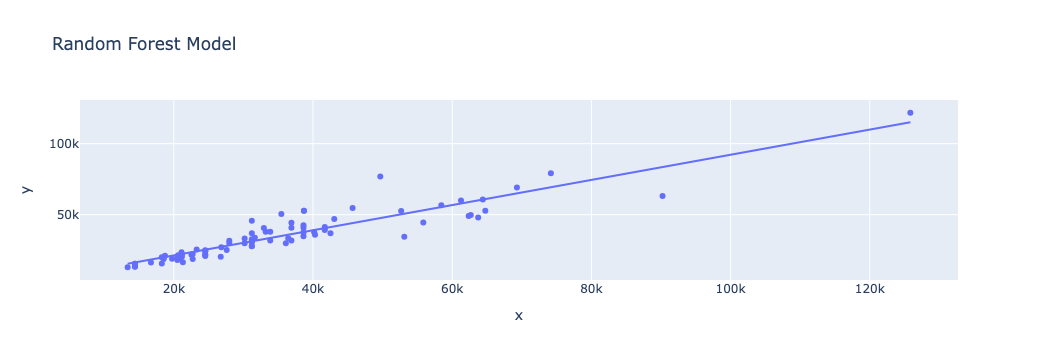

In [355]:
predictions_random_forest = random_forest_model.predict(X_test)
plot_results(random_forest_model, 'Random Forest Model', predictions_random_forest, y_test)

In [356]:
get_score(predictions_random_forest, y_test)

MAE:  4388.68
MSE:  49639476.51
RMSE:  7045.53
R^2 Score:  0.85


## XG-BOOST Model

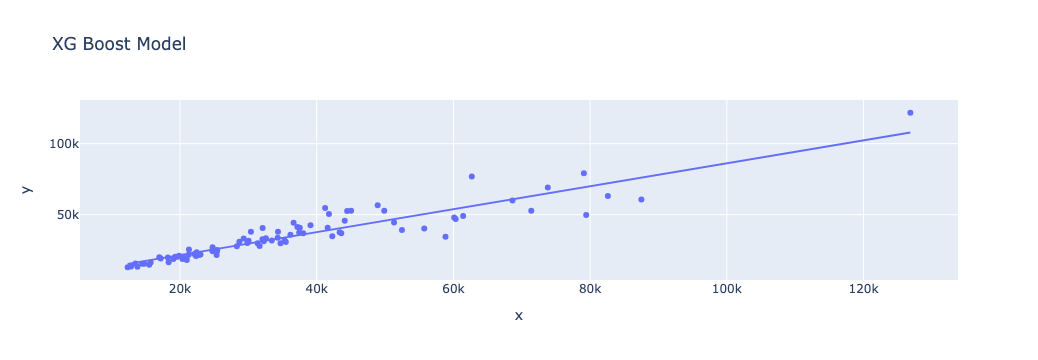

In [357]:
predictions_XGBoost = xgb_model.predict(X_test)
plot_results(xgb_model, 'XG Boost Model', predictions_XGBoost, y_test)

In [358]:
get_score(predictions_XGBoost, y_test)

MAE:  4765.98
MSE:  60470392.0
RMSE:  7776.27
R^2 Score:  0.85


## Gradien Boosting Model

In [359]:
predictions_GradientBoost = gb.predict(X_test)
plot_results(gb, 'Gradient Boosting Model', predictions_GradientBoost, y_test)

In [360]:
get_score(predictions_GradientBoost, y_test)

MAE:  4099.05
MSE:  38918633.12
RMSE:  6238.48
R^2 Score:  0.89
